## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import math
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### (a) Download the Anuran Calls (MFCCs) Data Set

In [2]:
file_data = pd.read_csv('../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv',delimiter=",")

In [3]:
mfcc_pd = file_data.iloc[:,:22]

In [4]:
mfcc_pd

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,-0.145668,-0.059364,0.024206,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,-0.164675,-0.105600,0.030767,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,-0.150025,-0.078615,0.024861,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,-0.153120,-0.075320,0.022903,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895


In [5]:
label_pd = file_data.iloc[:,22:25]

In [6]:
label_pd

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Leptodactylidae,Adenomera,AdenomeraAndre
3,Leptodactylidae,Adenomera,AdenomeraAndre
4,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
7190,Hylidae,Scinax,ScinaxRuber
7191,Hylidae,Scinax,ScinaxRuber
7192,Hylidae,Scinax,ScinaxRuber
7193,Hylidae,Scinax,ScinaxRuber


### (b) Train a classifier for each label

In [7]:
x_train,x_test,y_train,y_test = train_test_split(mfcc_pd, label_pd, test_size=0.3, random_state = 42)

In [8]:
x_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
2004,1.000000,0.327476,0.282440,0.572211,0.096509,-0.036705,-0.082174,0.146604,0.297338,-0.120902,...,0.438532,-0.148451,-0.260375,0.178628,0.218024,-0.042083,-0.126511,-0.090279,0.096176,0.191697
1194,1.000000,0.232818,-0.144331,-0.078909,-0.072467,0.255380,0.450215,0.261033,-0.168462,-0.281445,...,-0.108483,0.329984,0.274031,-0.157579,-0.291979,-0.042932,-0.009021,-0.032679,0.023912,0.041407
5359,0.966443,0.455914,1.000000,0.541650,-0.412873,0.307099,0.235819,-0.064025,0.069728,-0.052552,...,-0.073050,-0.140994,0.162584,-0.007981,-0.049428,-0.053166,-0.026728,0.029443,0.019032,-0.105221
1756,1.000000,0.257873,0.112807,0.527614,0.186094,0.043683,-0.163682,-0.014125,0.196527,0.018839,...,0.404813,-0.075488,-0.320882,0.024806,0.226971,0.034969,-0.106029,-0.147124,0.042627,0.250249
497,1.000000,0.401859,0.563219,0.578304,-0.126517,-0.058725,0.431806,0.066801,-0.321014,0.155569,...,-0.132244,0.190753,0.126674,-0.148049,-0.002891,0.157072,-0.015251,-0.055428,0.086927,0.086006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.000000,0.406366,0.268684,0.704863,0.358415,0.055376,-0.159812,0.065813,0.345068,0.175460,...,0.378497,-0.014091,-0.352985,0.015183,0.220504,0.054246,-0.069108,-0.174583,-0.032202,0.188263
5191,1.000000,0.634337,0.594395,0.403271,0.004960,0.037880,-0.065399,0.125276,0.106976,-0.223357,...,-0.228140,-0.274889,0.244973,0.096130,-0.140923,0.003646,0.007163,0.068718,0.047640,-0.179215
5226,1.000000,0.756413,0.732319,0.385807,-0.034821,0.073881,-0.058027,0.183775,0.219419,-0.445112,...,-0.177708,-0.311815,0.182382,0.030100,-0.182019,0.006296,-0.005868,0.029439,0.004783,-0.198014
5390,0.931410,0.626137,1.000000,0.375834,-0.223044,0.325943,0.121659,-0.092542,0.163365,-0.049382,...,-0.047610,-0.188463,0.102240,0.150353,-0.054750,-0.054434,0.108092,0.156994,-0.051681,-0.085656


In [9]:
y_train

,Family,Genus,Species
2004,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1194,Dendrobatidae,Ameerega,Ameeregatrivittata
5359,Hylidae,Hypsiboas,HypsiboasCinerascens
1756,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
497,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...
3772,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5191,Hylidae,Hypsiboas,HypsiboasCinerascens
5226,Hylidae,Hypsiboas,HypsiboasCinerascens
5390,Hylidae,Hypsiboas,HypsiboasCinerascens


In [10]:
x_test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
3340,1.0,0.147506,0.014843,0.433466,0.169581,0.053135,-0.152020,-0.102427,0.153061,0.128628,...,0.341701,0.008463,-0.290680,0.016310,0.285756,0.166246,-0.061206,-0.191878,0.003221,0.255371
5108,1.0,0.674174,0.767520,0.392177,0.035669,0.181548,-0.013677,0.187262,0.144679,-0.424524,...,-0.142909,-0.209932,0.285255,0.103722,-0.157943,-0.048913,-0.016129,0.129200,0.011245,-0.275909
6524,1.0,-0.007777,0.363276,0.413224,0.196296,0.222389,0.097128,-0.155608,-0.035013,0.133689,...,0.016052,-0.028317,-0.102525,-0.005594,0.125169,0.044882,-0.013309,-0.026086,-0.088825,-0.018968
3649,1.0,0.429359,0.297881,0.609120,0.263991,-0.030414,-0.160778,0.076217,0.285909,0.052029,...,0.374639,0.012647,-0.317314,-0.023621,0.230330,0.069015,-0.101196,-0.152351,0.039065,0.233823
1617,1.0,0.190599,0.062234,0.617262,0.208825,0.027108,-0.214441,0.009654,0.299053,0.039013,...,0.402628,-0.110486,-0.306343,0.082182,0.321598,0.128742,-0.152977,-0.223482,0.016131,0.250754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,1.0,0.469993,0.342252,0.508362,0.184239,0.138370,-0.070231,0.034221,0.226367,-0.001120,...,0.256172,-0.229460,-0.247905,0.179489,0.186595,-0.080672,-0.104266,-0.077342,0.159712,0.239398
142,1.0,0.162558,-0.115829,0.045608,0.226107,0.325952,0.157953,-0.124050,-0.009148,0.235613,...,-0.318516,0.312135,0.401665,0.120251,-0.120102,-0.226043,-0.161989,0.037390,0.185305,0.059824
1490,1.0,0.160219,0.137078,0.599525,0.252240,0.077200,-0.132288,-0.001605,0.244840,0.081377,...,0.443526,-0.090678,-0.323009,0.082091,0.275059,0.046851,-0.108847,-0.190397,-0.011276,0.217408
2574,1.0,0.523548,0.387887,0.539775,0.087532,0.028962,-0.025403,0.064718,0.215919,-0.005312,...,0.342035,-0.160502,-0.156745,0.175613,0.120708,-0.133983,-0.092651,0.011379,0.109798,0.100649


In [11]:
y_test

,Family,Genus,Species
3340,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
5108,Hylidae,Hypsiboas,HypsiboasCinerascens
6524,Hylidae,Hypsiboas,HypsiboasCordobae
3649,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1617,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
1224,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
142,Leptodactylidae,Adenomera,AdenomeraAndre
1490,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2574,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


#### (i) Research

Exact match and Hamming score/loss are methods for evaluating the performance of multi-label classification models.

1. <strong>Exact Match</strong> - indicates the fraction of samples for which the model predicted all correct labels. It is a binary metric (between 0 and 1) with 0 indicating worst performance and 1 indicating the best performance of the model.<br/><br/>
<em>Approach for our classifier - Sample based accuracy method as every label of a sample must exactly match to the one in the dataset.</em><br/><br/>

2. <strong>Hamming Score</strong> - indicates the fraction of correctly predicted labels to the total number of labels. It is a score between 0 and 1 with higher score or scores towards 1 indicate better model performance.

3. <strong>Hamming Loss</strong> - indicates the fraction of incorrectly predicted labels to the total number of labels. It is a score between 0 and 1 with lower score or scores towards 0 indicate better model performance.<br/><br/>
<em>Approach for our classifier - Label based method that counts each mismatched label instead of considering the labels of sample data as one.</em>

#### (ii) Train a SVM for each of the labels

In [12]:
y_tr_family = y_train['Family']

In [13]:
y_tr_family

2004    Leptodactylidae
1194      Dendrobatidae
5359            Hylidae
1756    Leptodactylidae
497     Leptodactylidae
             ...       
3772    Leptodactylidae
5191            Hylidae
5226            Hylidae
5390            Hylidae
860       Dendrobatidae
Name: Family, Length: 5036, dtype: object

In [14]:
y_tr_genus = y_train['Genus']

In [15]:
y_tr_genus

2004    Adenomera
1194     Ameerega
5359    Hypsiboas
1756    Adenomera
497     Adenomera
          ...    
3772    Adenomera
5191    Hypsiboas
5226    Hypsiboas
5390    Hypsiboas
860      Ameerega
Name: Genus, Length: 5036, dtype: object

In [16]:
y_tr_species = y_train['Species']

In [17]:
y_tr_species

2004    AdenomeraHylaedactylus
1194        Ameeregatrivittata
5359      HypsiboasCinerascens
1756    AdenomeraHylaedactylus
497             AdenomeraAndre
                 ...          
3772    AdenomeraHylaedactylus
5191      HypsiboasCinerascens
5226      HypsiboasCinerascens
5390      HypsiboasCinerascens
860         Ameeregatrivittata
Name: Species, Length: 5036, dtype: object

In [18]:
y_tst_family = y_test['Family']

In [19]:
y_tst_family

3340    Leptodactylidae
5108            Hylidae
6524            Hylidae
3649    Leptodactylidae
1617    Leptodactylidae
             ...       
1224    Leptodactylidae
142     Leptodactylidae
1490    Leptodactylidae
2574    Leptodactylidae
2653    Leptodactylidae
Name: Family, Length: 2159, dtype: object

In [20]:
y_tst_genus = y_test['Genus']

In [21]:
y_tst_genus

3340    Adenomera
5108    Hypsiboas
6524    Hypsiboas
3649    Adenomera
1617    Adenomera
          ...    
1224    Adenomera
142     Adenomera
1490    Adenomera
2574    Adenomera
2653    Adenomera
Name: Genus, Length: 2159, dtype: object

In [22]:
y_tst_species = y_test['Species']

In [23]:
y_tst_species

3340    AdenomeraHylaedactylus
5108      HypsiboasCinerascens
6524         HypsiboasCordobae
3649    AdenomeraHylaedactylus
1617    AdenomeraHylaedactylus
                 ...          
1224    AdenomeraHylaedactylus
142             AdenomeraAndre
1490    AdenomeraHylaedactylus
2574    AdenomeraHylaedactylus
2653    AdenomeraHylaedactylus
Name: Species, Length: 2159, dtype: object

In [24]:
svc_model = SVC(kernel='rbf',random_state=42,max_iter=1000) #Gaussian Kernel

In [25]:
regularization = [10**num for num in range(-3,7)] #assuming the threshold to be 70% accuracy at a minimum 
gamma = np.arange(0.1,2.1,0.1)
print(f'Regularization: {regularization}')
print(f'Gamma: {gamma}')

Regularization: [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]
Gamma: [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2. ]


In [26]:
param = {'C':regularization,'gamma':gamma}

In [27]:
def get_best_svc_model(model,param,x_train,y_train,label):
    smodel = GridSearchCV(model,param,cv=10)
    smodel = smodel.fit(x_train,y_train)
    best_c = smodel.best_params_["C"]
    best_gamma = smodel.best_params_["gamma"]
    print(f'Label - {label}')
    print(f'Best regularization/C: {best_c}')
    print(f'Best gamma: {best_gamma}')
    return (smodel,best_c,best_gamma)

In [28]:
svc_fam,sfam_c,sfam_gamma = get_best_svc_model(svc_model,param,x_train,y_tr_family,"Family")

Label - Family
Best regularization/C: 10
Best gamma: 2.0


In [29]:
svc_genus, sgenus_c,sgenus_gamma = get_best_svc_model(svc_model,param,x_train,y_tr_genus,"Genus")

Label - Genus
Best regularization/C: 100
Best gamma: 1.5000000000000002


In [30]:
svc_species,sspecies_c,sspecies_gamma = get_best_svc_model(svc_model,param,x_train,y_tr_species,"Species")

Label - Species
Best regularization/C: 10
Best gamma: 1.8000000000000003


In [31]:
def build_best_svc_model(x_train,y_train,C,gamma,x_test,label):
    svc = SVC(C=C,gamma=gamma,kernel="rbf",random_state=42,max_iter=1000) #gaussian kernel
    svc = svc.fit(x_train,y_train)
    y_predict = svc.predict(x_test)
    return (svc,pd.DataFrame(y_predict,columns=[label]))

In [32]:
sb_fam,y_fam_pred = build_best_svc_model(x_train,y_tr_family,sfam_c,sfam_gamma,x_test,"Family")

In [33]:
y_fam_pred

,Family
0,Leptodactylidae
1,Hylidae
2,Hylidae
3,Leptodactylidae
4,Leptodactylidae
...,...
2154,Leptodactylidae
2155,Leptodactylidae
2156,Leptodactylidae
2157,Leptodactylidae


In [34]:
sb_genus,y_genus_pred = build_best_svc_model(x_train,y_tr_genus,sgenus_c,sgenus_gamma,x_test,"Genus")

In [35]:
y_genus_pred

,Genus
0,Adenomera
1,Hypsiboas
2,Hypsiboas
3,Adenomera
4,Adenomera
...,...
2154,Adenomera
2155,Adenomera
2156,Adenomera
2157,Adenomera


In [36]:
sb_species,y_spec_pred = build_best_svc_model(x_train,y_tr_species,sspecies_c,sspecies_gamma,x_test,"Species")

In [37]:
y_spec_pred

,Species
0,AdenomeraHylaedactylus
1,HypsiboasCinerascens
2,HypsiboasCordobae
3,AdenomeraHylaedactylus
4,AdenomeraHylaedactylus
...,...
2154,AdenomeraHylaedactylus
2155,AdenomeraAndre
2156,AdenomeraHylaedactylus
2157,AdenomeraHylaedactylus


In [38]:
y_tot_pred = pd.concat([y_fam_pred,y_genus_pred,y_spec_pred],axis=1)

In [39]:
y_tot_pred

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


In [40]:
def calculate_hamming_score_loss(y_pred,y_true,label,dim1,dim2):
    corr_labelling = 0
    incorr_labelling = 0
    for i in range(0,len(y_true)):
        if y_pred[i] == y_true[i]:
            corr_labelling += 1
        else:
            incorr_labelling += 1
    exact_match = corr_labelling/dim1
    hamming_loss = incorr_labelling/(dim1*dim2)
    hamming_score = 1 - hamming_loss
    print(f'Label: {label}')
    print(f'Exact Match: {exact_match}')
    print(f'Hamming Score: {hamming_score}')
    print(f'Hamming Loss: {hamming_loss}')
    return (hamming_score,hamming_loss,exact_match)

<font color="red">Individual Labels</font>

In [41]:
sfam_hscore,sfam_hloss,sfam_ext = calculate_hamming_score_loss(list(y_fam_pred['Family']),list(y_tst_family),"Family",y_tst_family.shape[0],1)

Label: Family
Exact Match: 0.9939786938397406
Hamming Score: 0.9939786938397406
Hamming Loss: 0.006021306160259379


In [42]:
sgen_hscore,sgen_hloss,sgen_ext = calculate_hamming_score_loss(list(y_genus_pred['Genus']),list(y_tst_genus),"Genus",y_tst_genus.shape[0],1)

Label: Genus
Exact Match: 0.9907364520611394
Hamming Score: 0.9907364520611395
Hamming Loss: 0.009263547938860583


In [43]:
sspec_hscore,sspec_hloss,sspec_ext = calculate_hamming_score_loss(list(y_spec_pred['Species']),list(y_tst_species),"Species",y_tst_species.shape[0],1)

Label: Species
Exact Match: 0.9902732746641963
Hamming Score: 0.9902732746641963
Hamming Loss: 0.009726725335803613


<font color="blue">Combined labels</font>

In [44]:
def prep_data(list1,list2,list3):
    new_list = list(zip(list1,list2,list3))
    return list(map(lambda x:list(x),new_list))

In [45]:
y_all_pred = prep_data(list(y_fam_pred['Family']),list(y_genus_pred['Genus']),list(y_spec_pred['Species']))

In [46]:
y_all_pred

[['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHyla

In [47]:
y_all_test = prep_data(list(y_test['Family']),list(y_test['Genus']),list(y_test['Species']))

In [48]:
y_all_test

[['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHyla

In [49]:
sall_hscore,sall_sloss,sall_ext = calculate_hamming_score_loss(y_all_pred,y_all_test,"All",len(y_all_test),3)

Label: All
Exact Match: 0.9874942102825383
Hamming Score: 0.9958314034275128
Hamming Loss: 0.0041685965724872626


#### (iii) Repeat 1(b)ii with L1-penalized SVMs

In [50]:
std_scaler = preprocessing.StandardScaler()
x_train_std = std_scaler.fit_transform(x_train)

In [51]:
parameters = {'C':regularization}

In [52]:
lin_svc = LinearSVC(penalty="l1",dual=False,random_state=42)

In [53]:
def get_best_l1_svm(lin_svc,x_train,y_train,parameters,label):
    l1_model = GridSearchCV(lin_svc,parameters,cv=10)
    l1_model = l1_model.fit(x_train,y_train)
    l1_best_c = l1_model.best_params_['C']
    print(f'Label: {label}')
    print(f'Best Regularization/C: {l1_best_c}')
    return (l1_model,l1_best_c)

In [54]:
lfam_model,lfam_c = get_best_l1_svm(lin_svc,x_train_std,y_tr_family,parameters,"Family")

Label: Family
Best Regularization/C: 1


In [55]:
lgen_model, lgen_c = get_best_l1_svm(lin_svc,x_train_std,y_tr_genus,parameters,"Genus")

Label: Genus
Best Regularization/C: 10


In [56]:
lspec_model, lspec_c = get_best_l1_svm(lin_svc,x_train_std,y_tr_species,parameters,"Species")

Label: Species
Best Regularization/C: 10


In [57]:
def build_best_lin_svm(C,x_train,y_train,x_test,label):
    lmodel = LinearSVC(penalty="l1",C=C,dual=False,random_state=42)
    lmodel = lmodel.fit(x_train,y_train)
    y_pred = lmodel.predict(x_test)
    return (lmodel,pd.DataFrame(y_pred,columns=[label]))

In [58]:
x_test_std = std_scaler.fit_transform(x_test)

In [59]:
lbest_fam, y_lb_fpred = build_best_lin_svm(lfam_c,x_train_std,y_tr_family,x_test_std,"Family")

In [60]:
y_lb_fpred

,Family
0,Leptodactylidae
1,Hylidae
2,Hylidae
3,Leptodactylidae
4,Leptodactylidae
...,...
2154,Leptodactylidae
2155,Leptodactylidae
2156,Leptodactylidae
2157,Leptodactylidae


In [61]:
lbest_gen,y_lb_gpred = build_best_lin_svm(lgen_c,x_train_std,y_tr_genus,x_test_std,"Genus")

In [62]:
y_lb_gpred

,Genus
0,Adenomera
1,Hypsiboas
2,Hypsiboas
3,Adenomera
4,Adenomera
...,...
2154,Adenomera
2155,Adenomera
2156,Adenomera
2157,Adenomera


In [63]:
lbest_spec, y_lb_spred = build_best_lin_svm(lspec_c,x_train_std,y_tr_species,x_test_std,"Species")

In [64]:
y_lb_spred

,Species
0,AdenomeraHylaedactylus
1,HypsiboasCinerascens
2,HypsiboasCordobae
3,AdenomeraHylaedactylus
4,AdenomeraHylaedactylus
...,...
2154,AdenomeraHylaedactylus
2155,AdenomeraAndre
2156,AdenomeraHylaedactylus
2157,AdenomeraHylaedactylus


In [65]:
y_lb_tot_pred = pd.concat([y_lb_fpred,y_lb_gpred,y_lb_spred],axis=1)

In [66]:
y_lb_tot_pred

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


<font color="red">Individual Labels</font>

In [67]:
lfam_hscore,lfam_hloss,lfam_ext = calculate_hamming_score_loss(list(y_lb_fpred['Family']),list(y_tst_family),"Family",y_tst_family.shape[0],1)

Label: Family
Exact Match: 0.9258916164891153
Hamming Score: 0.9258916164891153
Hamming Loss: 0.07410838351088467


In [68]:
lgen_hscore,lgen_hloss,lgen_ext = calculate_hamming_score_loss(list(y_lb_gpred['Genus']),list(y_tst_genus),"Genus",y_tst_genus.shape[0],1)

Label: Genus
Exact Match: 0.9388605836035201
Hamming Score: 0.9388605836035202
Hamming Loss: 0.06113941639647985


In [69]:
lspec_hscore,lspec_hloss,lspec_ext = calculate_hamming_score_loss(list(y_lb_spred['Species']),list(y_tst_species),"Species",y_tst_species.shape[0],1)

Label: Species
Exact Match: 0.9592403890690134
Hamming Score: 0.9592403890690134
Hamming Loss: 0.04075961093098657


<font color="blue">All Labels Combined</font>

In [70]:
y_all_lb = prep_data(list(y_lb_fpred['Family']),list(y_lb_gpred['Genus']),list(y_lb_spred['Species']))

In [71]:
y_all_lb

[['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHyla

In [72]:
lall_hscore,lall_hloss,lall_ext = calculate_hamming_score_loss(y_all_lb,y_all_test,"All",len(y_all_test),3)

Label: All
Exact Match: 0.9092172301991662
Hamming Score: 0.9697390767330554
Hamming Loss: 0.030260923266944573


#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance

In [73]:
smote = SMOTE()

In [74]:
def prep_data_with_smote(smote,x_train,y_train,xlabel,ylabel):
    x_smote,y_smote = smote.fit_resample(x_train,y_train)
    return (pd.DataFrame(x_smote,columns=xlabel),pd.DataFrame(y_smote,columns=ylabel))

In [75]:
x_sm_tr_family, y_sm_tr_family = prep_data_with_smote(smote,x_train_std,y_tr_family,x_train.columns,["Family"])

In [76]:
x_sm_tr_family

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.152650,0.003519,-0.113627,0.784358,-0.200077,-1.106064,-0.460771,1.257761,0.937894,-1.401044,...,1.392737,-0.718716,-0.844945,1.149412,0.938437,-0.599301,-0.945201,-0.386661,0.763875,0.841487
1,0.152650,-0.425788,-1.730997,-3.300931,-1.247680,1.314366,2.713662,2.243005,-1.689411,-2.671442,...,-1.256970,2.445364,2.011597,-1.677197,-2.770201,-0.609333,0.476943,0.226740,-0.149397,-0.377184
2,-0.303474,0.586027,2.605770,0.592614,-3.358105,1.742951,1.435300,-0.555779,-0.345921,-0.860185,...,-1.085333,-0.669404,1.415884,-0.419475,-1.006422,-0.730157,0.262610,0.888295,-0.211064,-1.566154
3,0.152650,-0.312156,-0.756501,0.504547,0.355322,-0.439906,-0.946771,-0.126135,0.369278,-0.295261,...,1.229407,-0.236187,-1.168372,-0.143824,1.003501,0.310414,-0.697276,-0.992017,0.087123,1.316269
4,0.152650,0.340871,0.950464,0.822589,-1.582777,-1.288530,2.603894,0.570650,-2.549861,0.786700,...,-1.372063,1.524571,1.223935,-1.597081,-0.668013,1.752018,0.401533,-0.015516,0.646985,-0.015540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287,0.152650,1.155055,0.703080,0.104366,-0.163219,0.727185,-0.119671,0.584044,0.202671,-0.863350,...,-0.748601,-1.275808,1.270337,0.666733,-1.727986,-0.290921,0.770369,0.459620,0.373854,-1.314719
12288,0.152650,-2.946176,-0.951355,2.969968,2.049855,-1.823557,-1.111743,1.310042,0.687157,-0.849323,...,1.179003,-0.253415,-1.144499,0.467615,1.389982,1.319346,0.354415,0.010468,-0.051106,0.826670
12289,0.142425,1.684619,1.993913,0.000229,-2.002414,0.891124,1.851461,-1.602336,-0.846010,0.994951,...,-0.377716,0.566065,0.323280,-0.165511,-0.755006,-0.182105,0.546682,0.239783,-0.336457,-0.552335
12290,0.152650,0.918696,0.938035,-0.443232,-0.410819,0.916150,0.041014,-1.280270,-0.423293,0.596560,...,0.030543,-0.490847,0.236593,1.151360,-0.015044,-0.228014,1.011327,-0.030807,-0.922605,0.245817


In [77]:
x_sm_tr_genus, y_sm_tr_genus = prep_data_with_smote(smote,x_train_std,y_tr_genus,x_train.columns,["Genus"])

In [78]:
x_sm_tr_genus

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.152650,0.003519,-0.113627,0.784358,-0.200077,-1.106064,-0.460771,1.257761,0.937894,-1.401044,...,1.392737,-0.718716,-0.844945,1.149412,0.938437,-0.599301,-0.945201,-0.386661,0.763875,0.841487
1,0.152650,-0.425788,-1.730997,-3.300931,-1.247680,1.314366,2.713662,2.243005,-1.689411,-2.671442,...,-1.256970,2.445364,2.011597,-1.677197,-2.770201,-0.609333,0.476943,0.226740,-0.149397,-0.377184
2,-0.303474,0.586027,2.605770,0.592614,-3.358105,1.742951,1.435300,-0.555779,-0.345921,-0.860185,...,-1.085333,-0.669404,1.415884,-0.419475,-1.006422,-0.730157,0.262610,0.888295,-0.211064,-1.566154
3,0.152650,-0.312156,-0.756501,0.504547,0.355322,-0.439906,-0.946771,-0.126135,0.369278,-0.295261,...,1.229407,-0.236187,-1.168372,-0.143824,1.003501,0.310414,-0.697276,-0.992017,0.087123,1.316269
4,0.152650,0.340871,0.950464,0.822589,-1.582777,-1.288530,2.603894,0.570650,-2.549861,0.786700,...,-1.372063,1.524571,1.223935,-1.597081,-0.668013,1.752018,0.401533,-0.015516,0.646985,-0.015540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23187,0.152650,-1.996032,0.664641,0.450207,0.792852,-0.100523,-1.140729,0.834106,-0.004443,-0.321093,...,-0.472512,0.190329,0.425436,0.205280,-0.412672,0.006355,0.516149,0.958451,-0.502482,-0.803752
23188,0.152650,-3.838566,-2.328189,-2.884258,-0.416952,2.391197,0.611426,-0.948260,-0.433863,0.175737,...,-1.486680,-0.250373,0.689370,-0.283518,-0.290869,0.645024,0.697512,1.014877,-0.693751,-1.406393
23189,0.152650,-3.862572,-1.941391,-1.838595,-0.144854,2.607687,0.182213,-1.620929,-0.274706,0.771719,...,-1.579403,-0.094331,0.698624,-0.639256,-0.313746,1.103102,0.897676,0.673278,-1.139109,-1.500672
23190,0.152650,-3.811147,-1.844428,-0.850634,0.220172,2.684583,-0.635020,-2.494086,-0.238343,1.426666,...,-1.688801,0.283224,1.022841,-0.435909,-0.477856,1.701073,1.087650,0.649831,-0.445369,-0.879912


In [79]:
x_sm_tr_species, y_sm_tr_species = prep_data_with_smote(smote,x_train_std,y_tr_species,x_train.columns,["Species"])

In [80]:
x_sm_tr_species

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,0.152650,0.003519,-0.113627,0.784358,-0.200077,-1.106064,-0.460771,1.257761,0.937894,-1.401044,...,1.392737,-0.718716,-0.844945,1.149412,0.938437,-0.599301,-0.945201,-0.386661,0.763875,0.841487
1,0.152650,-0.425788,-1.730997,-3.300931,-1.247680,1.314366,2.713662,2.243005,-1.689411,-2.671442,...,-1.256970,2.445364,2.011597,-1.677197,-2.770201,-0.609333,0.476943,0.226740,-0.149397,-0.377184
2,-0.303474,0.586027,2.605770,0.592614,-3.358105,1.742951,1.435300,-0.555779,-0.345921,-0.860185,...,-1.085333,-0.669404,1.415884,-0.419475,-1.006422,-0.730157,0.262610,0.888295,-0.211064,-1.566154
3,0.152650,-0.312156,-0.756501,0.504547,0.355322,-0.439906,-0.946771,-0.126135,0.369278,-0.295261,...,1.229407,-0.236187,-1.168372,-0.143824,1.003501,0.310414,-0.697276,-0.992017,0.087123,1.316269
4,0.152650,0.340871,0.950464,0.822589,-1.582777,-1.288530,2.603894,0.570650,-2.549861,0.786700,...,-1.372063,1.524571,1.223935,-1.597081,-0.668013,1.752018,0.401533,-0.015516,0.646985,-0.015540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24465,0.152650,-0.478278,-0.031714,-2.146220,-1.017378,-0.275038,0.468370,0.528038,-0.968205,-0.895160,...,-0.592571,0.504559,0.494543,-0.618202,-0.767929,-0.392604,0.787944,0.830035,-0.402901,-0.857943
24466,0.152650,-1.586136,1.398561,0.865179,-0.773761,-1.162746,-0.089845,1.656584,0.326654,-1.501465,...,-0.498157,0.101033,0.345574,-0.178658,-0.061190,-0.084962,-0.225150,0.550963,-0.192972,-0.443387
24467,0.152650,0.554831,1.392534,-2.163156,-1.613649,1.552437,0.326263,0.739720,-0.995984,-1.205006,...,-0.775136,2.103848,0.569807,-1.950802,-0.559019,0.651241,0.684098,1.402693,0.361700,-0.503910
24468,-8.690771,-0.939770,2.605770,0.377545,-2.022559,0.941189,-0.677790,1.202702,0.253837,-3.235817,...,-0.705365,0.221277,0.321398,-0.231217,1.436763,1.162447,-0.864863,1.053334,-1.356887,-0.833025


In [81]:
sm_lin_svc = LinearSVC(penalty="l1",dual=False,random_state=42)

In [82]:
sm_param = {'C':regularization}

In [83]:
sm_fam_model,sm_fam_c = get_best_l1_svm(sm_lin_svc,x_sm_tr_family,y_sm_tr_family,sm_param,"Family")

Label: Family
Best Regularization/C: 100


In [84]:
sm_gen_model,sm_gen_c = get_best_l1_svm(sm_lin_svc,x_sm_tr_genus,y_sm_tr_genus,sm_param,"Genus")

Label: Genus
Best Regularization/C: 100


In [85]:
sm_spec_model,sm_spec_c = get_best_l1_svm(sm_lin_svc,x_sm_tr_species,y_sm_tr_species,sm_param,"Species")

Label: Species
Best Regularization/C: 10


In [86]:
smbest_fam,y_sm_fpred = build_best_lin_svm(sm_fam_c,x_sm_tr_family,y_sm_tr_family,x_test_std,"Family")

In [87]:
y_sm_fpred

,Family
0,Leptodactylidae
1,Hylidae
2,Hylidae
3,Leptodactylidae
4,Leptodactylidae
...,...
2154,Leptodactylidae
2155,Leptodactylidae
2156,Leptodactylidae
2157,Leptodactylidae


In [88]:
smbest_gen,y_sm_gpred = build_best_lin_svm(sm_gen_c,x_sm_tr_genus,y_sm_tr_genus,x_test_std,"Genus")

In [89]:
y_sm_gpred

,Genus
0,Adenomera
1,Hypsiboas
2,Hypsiboas
3,Adenomera
4,Adenomera
...,...
2154,Adenomera
2155,Adenomera
2156,Adenomera
2157,Adenomera


In [90]:
smbest_spec,y_sm_spred = build_best_lin_svm(sm_fam_c,x_sm_tr_species,y_sm_tr_species,x_test_std,"Species")

In [91]:
y_sm_spred

,Species
0,AdenomeraHylaedactylus
1,HypsiboasCinerascens
2,HypsiboasCordobae
3,AdenomeraHylaedactylus
4,AdenomeraHylaedactylus
...,...
2154,AdenomeraHylaedactylus
2155,AdenomeraAndre
2156,AdenomeraHylaedactylus
2157,AdenomeraHylaedactylus


In [92]:
y_sm_all = pd.concat([y_sm_fpred,y_sm_gpred,y_sm_spred],axis=1)

In [93]:
y_sm_all

,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
4,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
...,...,...,...
2154,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2155,Leptodactylidae,Adenomera,AdenomeraAndre
2156,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2157,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


<font color="red">Individual Labels</font>

In [94]:
sm_fam_hscore,sm_fam_hloss,sm_fam_ext = calculate_hamming_score_loss(list(y_sm_fpred['Family']),list(y_tst_family),"Family",y_tst_family.shape[0],1)

Label: Family
Exact Match: 0.9119962945808244
Hamming Score: 0.9119962945808244
Hamming Loss: 0.08800370541917554


In [95]:
sm_gen_hscore,sm_gen_hloss,sm_gen_ext = calculate_hamming_score_loss(list(y_sm_gpred['Genus']),list(y_tst_genus),"Genus",y_tst_genus.shape[0],1)

Label: Genus
Exact Match: 0.9147753589624826
Hamming Score: 0.9147753589624826
Hamming Loss: 0.08522464103751737


In [96]:
sm_spec_hscore,sm_spec_hloss,sm_spec_ext = calculate_hamming_score_loss(list(y_sm_spred['Species']),list(y_tst_species),"Species",y_tst_species.shape[0],1)

Label: Species
Exact Match: 0.9559981472904122
Hamming Score: 0.9559981472904122
Hamming Loss: 0.04400185270958777


<font color="blue">All Labels Combined</font>

In [97]:
y_all_sm = prep_data(list(y_sm_fpred['Family']),list(y_sm_gpred['Genus']),list(y_sm_spred['Species']))

In [98]:
y_all_sm

[['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Dendropsophus', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCinerascens'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraAndre'],
 ['Dendrobatidae', 'Ameerega', 'Ameeregatrivittata'],
 ['Hylidae', 'Hypsiboas', 'HypsiboasCordobae'],
 ['Bufonidae', 'Osteocephalus', 'AdenomeraAndre'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHylaedactylus'],
 ['Leptodactylidae', 'Adenomera', 'AdenomeraHy

In [99]:
sm_all_hscore,sm_all_hloss,sm_all_ext = calculate_hamming_score_loss(y_all_sm,y_all_test,"All",len(y_all_test),3)

Label: All
Exact Match: 0.8679944418712366
Hamming Score: 0.9559981472904122
Hamming Loss: 0.04400185270958777


## Summary of question 1

In [100]:
summary_data = [[sfam_hscore,sfam_hloss,sfam_ext],[sgen_hscore,sgen_hloss,sgen_ext],
                [sspec_hscore,sspec_hloss,sspec_ext],[sall_hscore,sall_sloss,sall_ext],
                [lfam_hscore,lfam_hloss,lfam_ext],[lgen_hscore,lgen_hloss,lgen_ext],
                [lspec_hscore,lspec_hloss,lspec_ext],[lall_hscore,lall_hloss,lall_ext],
                [sm_fam_hscore,sm_fam_hloss,sm_fam_ext],[sm_gen_hscore,sm_gen_hloss,sm_gen_ext],
                [sm_spec_hscore,sm_spec_hloss,sm_spec_ext],[sm_all_hscore,sm_all_hloss,sm_all_ext]]

In [101]:
summary_index = ['SVM - Family','SVM - Genus','SVM - Species','SVM - All Labels',
                 'L1-Penalized SVM - Family','L1-Penalized SVM - Genus','L1-Penalized SVM - Species','L1-Penalized SVM - All Labels',
                 'SVM with SMOTE - Family','SVM with SMOTE - Genus','SVM with SMOTE - Species','SVM with SMOTE - All Labels']

In [102]:
summary_columns = ['Hamming Score','Hamming Loss','Exact Match']

In [103]:
summary_df = pd.DataFrame(summary_data,columns=summary_columns,index=summary_index)

In [104]:
summary_df

,Hamming Score,Hamming Loss,Exact Match
SVM - Family,0.993979,0.006021,0.993979
SVM - Genus,0.990736,0.009264,0.990736
SVM - Species,0.990273,0.009727,0.990273
SVM - All Labels,0.995831,0.004169,0.987494
L1-Penalized SVM - Family,0.925892,0.074108,0.925892
L1-Penalized SVM - Genus,0.938861,0.061139,0.938861
L1-Penalized SVM - Species,0.959240,0.040760,0.959240
L1-Penalized SVM - All Labels,0.969739,0.030261,0.909217
SVM with SMOTE - Family,0.911996,0.088004,0.911996
SVM with SMOTE - Genus,0.914775,0.085225,0.914775


<font color="brown">
    As seen above, for the multi-label multi-class(all label) case, the Gaussian SVM model has the highest hamming score of 0.995831 (higher the hamming score, better the model performance), lowest hamming loss of 0.004169 (lower the hamming loss, better the model performance) and the highest exact match of 0.987494 (higher the score, better the model performance). It is important to note that our data was normalized to begin with.<br/>
<font color="green">Although the Gaussian SVM yields the best model in our case, we still need to consider dataset type when we are building the SVM model in general. If the dataset contains high class imbalance in the training set then it results in the hyperplanes that are skewed to the minority class. In such cases, the SVM with SMOTE would be more better as it would give the minority class data a fighting chance during classification at the cost of a very minute decrease in accuracy.</font><br/>
<font color="purple">Similarly, if the dataset is not clean(denormalized or unstable), then the model suffers as SVM optimization occurs by minimizing the decision vector, and the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training.</font>
</font>

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set

### (a) Use k-means clustering

#### choosing best k based on elbow method or elbow technique

In [105]:
k_range = list(range(1,51))

In [106]:
sse = [] # sum of squared errors
for k in k_range:
    km_model = KMeans(n_clusters=k)
    km_model = km_model.fit(mfcc_pd)
    print(f'k: {k}')
    serror = km_model.inertia_
    print(f'Sum of squared error: {serror}\n')
    sse.append(serror)

k: 1
Sum of squared error: 3727.5241671398458

k: 2
Sum of squared error: 2465.7641259381994

k: 3
Sum of squared error: 1984.734424360954

k: 4
Sum of squared error: 1733.7574058167686

k: 5
Sum of squared error: 1513.672227949059

k: 6
Sum of squared error: 1400.0542614100762

k: 7
Sum of squared error: 1294.7267931797987

k: 8
Sum of squared error: 1214.3342999705276

k: 9
Sum of squared error: 1136.031255926574

k: 10
Sum of squared error: 1073.2900328175162

k: 11
Sum of squared error: 1018.18785705111

k: 12
Sum of squared error: 966.2128679824301

k: 13
Sum of squared error: 926.8414765527004

k: 14
Sum of squared error: 898.6626806925999

k: 15
Sum of squared error: 868.2877359094904

k: 16
Sum of squared error: 845.2209954663842

k: 17
Sum of squared error: 818.9579058111971

k: 18
Sum of squared error: 795.3522834704626

k: 19
Sum of squared error: 785.5190028042466

k: 20
Sum of squared error: 763.5488690073446

k: 21
Sum of squared error: 750.9357989122356

k: 22
Sum of squ

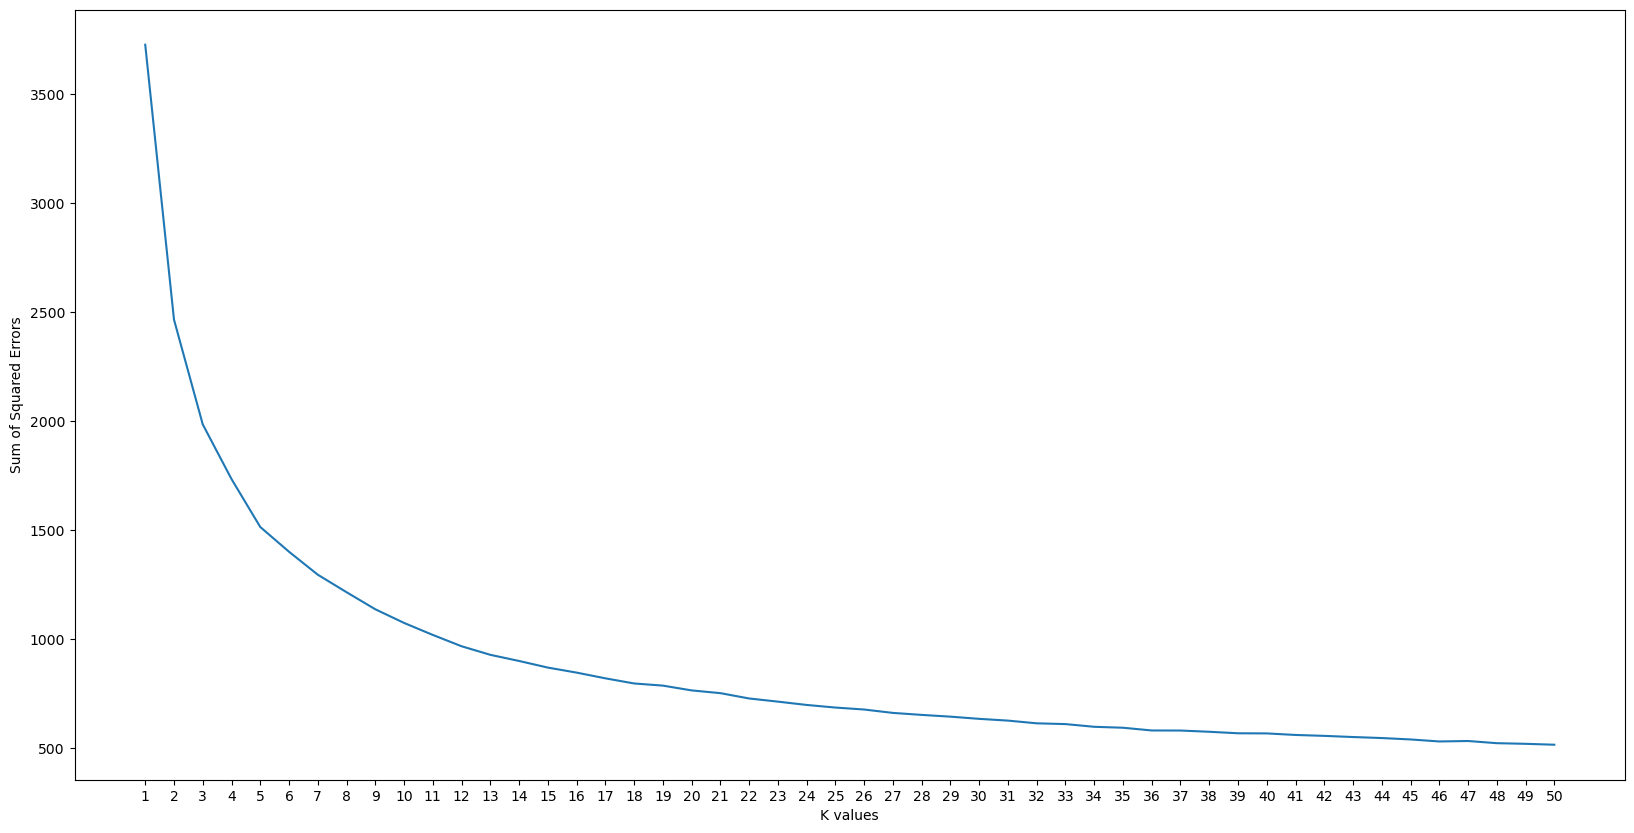

In [107]:
plt.figure(figsize=(20,10))
plt.xlabel("K values")
plt.ylabel("Sum of Squared Errors")
plt.xticks(k_range)
plt.plot(k_range,sse)
plt.show()

Based on the above plot, we can say that the elbow of the plot is at K=4. Hence, we can conclude that best k value is 4

#### Choosing k based on silhouette score

In [108]:
sil_score = []
for k in range(2,51):
    kmodel = KMeans(n_clusters=k)
    kmodel = kmodel.fit(mfcc_pd)
    labels = kmodel.labels_
    score = silhouette_score(mfcc_pd,labels)
    print(f'k: {k}')
    print(f'silhouette score: {score}')
    sil_score.append(score)

k: 2
silhouette score: 0.3486778410277152
k: 3
silhouette score: 0.36768245219926315
k: 4
silhouette score: 0.3787509343305295
k: 5
silhouette score: 0.37148280578022025
k: 6
silhouette score: 0.26432254146789597
k: 7
silhouette score: 0.2605424786999264
k: 8
silhouette score: 0.27007190135256365
k: 9
silhouette score: 0.26769191981308266
k: 10
silhouette score: 0.25852607986017284
k: 11
silhouette score: 0.2718760562813696
k: 12
silhouette score: 0.272953398063853
k: 13
silhouette score: 0.27761713272048616
k: 14
silhouette score: 0.26440466409597846
k: 15
silhouette score: 0.269188252132163
k: 16
silhouette score: 0.29310781728061536
k: 17
silhouette score: 0.27399548135583496
k: 18
silhouette score: 0.26675917511956276
k: 19
silhouette score: 0.25812241632968014
k: 20
silhouette score: 0.2818103466592654
k: 21
silhouette score: 0.27072093643615996
k: 22
silhouette score: 0.28416023742579094
k: 23
silhouette score: 0.2776194699380959
k: 24
silhouette score: 0.2681250289377082
k: 25
s

Based on the above values, we can conclude that best k value is 4 as it has the highest silhouette score of 0.3787509343305295

### (b) Determine which family is the majority

In [109]:
best_kmeans = KMeans(n_clusters=4)
y_predicted = best_kmeans.fit_predict(mfcc_pd)
y_df = pd.DataFrame(y_predicted,columns=['Cluster'])

In [110]:
def get_best_k():
    sil_score = []
    for k in range(2,51):
        kmodel = KMeans(n_clusters=k)
        kmodel = kmodel.fit(mfcc_pd)
        labels = kmodel.labels_
        score = silhouette_score(mfcc_pd,labels)
        sil_score.append(score)
    best_val = max(sil_score)
    return (sil_score.index(best_val)+2,best_val)

In [111]:
def get_cluster_information(y_data,cluster_id):
    return y_data[y_data["Cluster"]==cluster_id]

In [112]:
def get_majority_class(class_list,cluster):
    max_class = ""
    max_count = -math.inf
    for cl in class_list:
        cnt = cluster.count(cl)
        if cnt > max_count:
            max_class = cl
            max_count = cnt
    return max_class

In [113]:
def process_label(label,cluster_id,y_df):
    comp_df = pd.concat([label_pd[label],y_df],axis=1)
    cluster_df = get_cluster_information(comp_df,cluster_id)
    majority_class = get_majority_class(list(cluster_df[label].unique()),list(cluster_df[label]))
    return majority_class

In [114]:
def start_cluster_analysis(y_df):
    result = []
    for i in range(0,4):
        result.append([process_label("Family",i,y_df),process_label("Genus",i,y_df),process_label("Species",i,y_df)])
    result_df = pd.DataFrame(result,columns=['Majority Family','Majority Genus','Majority Species']
                         ,index = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3'])
    print(result_df)
    return result

In [115]:
res = start_cluster_analysis(y_df)

           Majority Family Majority Genus        Majority Species
Cluster 0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 1          Hylidae      Hypsiboas       HypsiboasCordobae
Cluster 2          Hylidae      Hypsiboas    HypsiboasCinerascens
Cluster 3    Dendrobatidae       Ameerega      Ameeregatrivittata


### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss

In [116]:
def calculate_hamming_distance(y_data,majority_class,dim):
    incorr_labelling = 0
    misclf = 0
    for ind in y_data.index:
        if [y_data['Family'][ind],y_data['Genus'][ind],y_data['Species'][ind]] != majority_class[y_data['Cluster'][ind]]:
            incorr_labelling += 1
        if y_data['Family'][ind] != majority_class[y_data['Cluster'][ind]][0]:
            misclf += 1
        if y_data['Genus'][ind] != majority_class[y_data['Cluster'][ind]][1]:
            misclf += 1
        if y_data['Species'][ind] != majority_class[y_data['Cluster'][ind]][2]:
            misclf += 1
    hamming_distance = misclf/dim
    hamming_loss = incorr_labelling/dim
    hamming_score = 1 - hamming_loss
    return (hamming_distance,hamming_loss,hamming_score)

In [117]:
h_df = pd.concat([label_pd,y_df],axis=1)

In [118]:
calculate_hamming_distance(h_df,res,len(h_df.index))

(0.6674079221681724, 0.24461431549687282, 0.7553856845031272)

### Monte Carlo Simulation

In [119]:
ham_dist = []
ham_loss = []
ham_score = []
for itr in range(1,51):
    print(f'Iteration: {itr}')
    bk,bsscore = get_best_k()
    print(f'Best k: {bk}')
    print(f'Best Silhouette Score: {bsscore}')
    bkmeans = KMeans(n_clusters=bk)
    y_bkpred = bkmeans.fit_predict(mfcc_pd)
    y_bkdf = pd.DataFrame(y_bkpred,columns=['Cluster'])
    print('Majority class per cluster:')
    bkres = start_cluster_analysis(y_bkdf)
    ham_df = pd.concat([label_pd,y_bkdf],axis=1)
    bk_hd,bk_hl,bk_hs = calculate_hamming_distance(ham_df,bkres,len(ham_df.index))
    print(f'Hamming Distance: {bk_hd}')
    print(f'Hamming Loss: {bk_hl}')
    print(f'Hamming Score: {bk_hs}')
    ham_dist.append(bk_hd)
    ham_loss.append(bk_hl)
    ham_score.append(bk_hs)
    print('\n')

Iteration: 1
Best k: 4
Best Silhouette Score: 0.3787509343305295
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0          Hylidae      Hypsiboas       HypsiboasCordobae
Cluster 1  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 2          Hylidae      Hypsiboas    HypsiboasCinerascens
Cluster 3    Dendrobatidae       Ameerega      Ameeregatrivittata
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 2
Best k: 4
Best Silhouette Score: 0.3787509343305295
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 1          Hylidae      Hypsiboas       HypsiboasCordobae
Cluster 2    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 3          Hylidae      Hypsiboas    HypsiboasCinerascens
Hamming Distance: 0.6653231410701876
Hamming Loss:

Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 17
Best k: 4
Best Silhouette Score: 0.3788646212055977
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 1    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 2          Hylidae      Hypsiboas       HypsiboasCordobae
Cluster 3          Hylidae      Hypsiboas    HypsiboasCinerascens
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 18
Best k: 4
Best Silhouette Score: 0.37888514720477384
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 1          Hylidae      Hypsiboas       HypsiboasCordobae
Cluster 2    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 3

Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 33
Best k: 4
Best Silhouette Score: 0.37867825251598397
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 1  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 2          Hylidae      Hypsiboas    HypsiboasCinerascens
Cluster 3          Hylidae      Hypsiboas       HypsiboasCordobae
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 34
Best k: 4
Best Silhouette Score: 0.3788646212055977
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 1  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 2          Hylidae      Hypsiboas    HypsiboasCinerascens
Cluster 3

Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 49
Best k: 4
Best Silhouette Score: 0.37863353074850936
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0          Hylidae      Hypsiboas    HypsiboasCinerascens
Cluster 1    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 2  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 3          Hylidae      Hypsiboas       HypsiboasCordobae
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2444753300903405
Hamming Score: 0.7555246699096595


Iteration: 50
Best k: 4
Best Silhouette Score: 0.3787509343305295
Majority class per cluster:
           Majority Family Majority Genus        Majority Species
Cluster 0  Leptodactylidae      Adenomera  AdenomeraHylaedactylus
Cluster 1          Hylidae      Hypsiboas    HypsiboasCinerascens
Cluster 2    Dendrobatidae       Ameerega      Ameeregatrivittata
Cluster 3

In [120]:
def get_avg(data):
    asum = 0
    for val in data:
        asum += val
    return asum/len(data)

In [121]:
print(f'Average Hamming Distance: {get_avg(ham_dist)}')
print(f'Average Hamming Loss: {get_avg(ham_loss)}')
print(f'Average Hamming Score: {get_avg(ham_score)}')

Average Hamming Distance: 0.6705628908964562
Average Hamming Loss: 0.24790271021542729
Average Hamming Score: 0.7520972897845724


In [128]:
print(f'Standard deviation of Hamming Distance: {np.std(ham_dist)}')
print(f'Standard deviation Hamming Loss: {np.std(ham_loss)}')
print(f'Standard deviation Hamming Score: {np.std(ham_score)}')

Standard deviation of Hamming Distance: 0.01405318414722689
Standard deviation Hamming Loss: 0.01466273274115265
Standard deviation Hamming Score: 0.014662732741152658


## 3. ISLR 12.6.2

In [122]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform

In [123]:
dmat = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])

a) On the basis of this dissimilarity matrix, sketch the dendrogram that results from hierarchically clustering these four observations using complete linkage. Be sure to indicate on the plot the height at which each fusion occurs, as well as the observations corresponding to each leaf in the dendrogram.

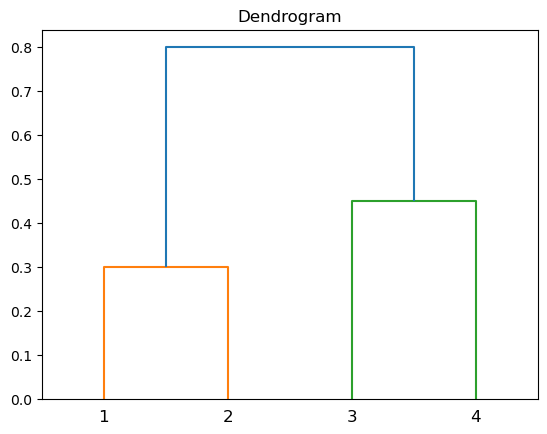

In [124]:
di_mat = squareform(dmat)
lmat1 = linkage(di_mat, "complete")
dendrogram(lmat1, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

b) Repeat (a), this time using single linkage clustering.

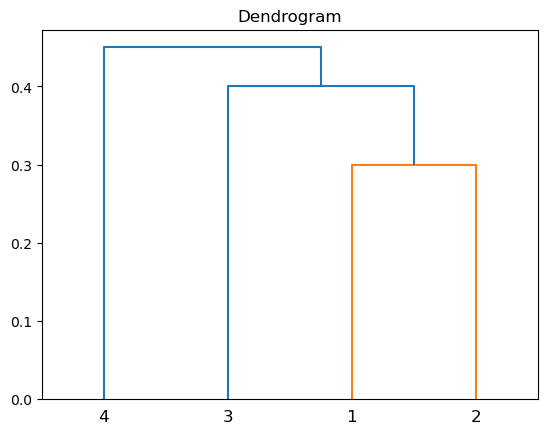

In [125]:
lmat2 = linkage(di_mat, "single")
dendrogram(lmat2, labels=["1", "2", "3", "4"])
plt.title("Dendrogram")
plt.show()

c) Suppose that we cut the dendrogram obtained in (a) such that two clusters result. Which observations are in each cluster?
1. Observation 1 - Cluster A
2. Observation 2 - Cluster A
3. Observation 3 - Cluster B
4. Observation 4 - Cluster B

d) Suppose that we cut the dendrogram obtained in (b) such that two clusters result. Which observations are in each cluster?
1. Observation 1 - Cluster A
2. Observation 2 - Cluster A
3. Observation 3 - Cluster A
4. Observation 4 - Cluster B

e) It is mentioned in the chapter that at each fusion in the dendrogram, the position of the two clusters being fused can be swapped without changing the meaning of the dendrogram. Draw a dendrogram that is equivalent to the dendrogram in (a), for which two or more of the leaves are repositioned, but for which the meaning of the dendrogram is the same.

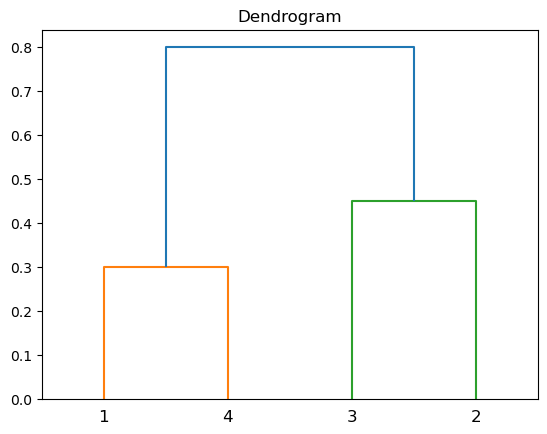

In [126]:
dmat2 = np.array([[0.0, 0.3, 0.4, 0.7], [0.3, 0.0, 0.5, 0.8], [0.4, 0.5, 0.0, 0.45], [0.7, 0.8, 0.45, 0.0]])
di_mat2 = squareform(dmat2)
lmat3 = linkage(di_mat2, "complete")
dendrogram(lmat3, labels=["1", "4", "3", "2"])
plt.title("Dendrogram")
plt.show()

### Citations:
1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
2. https://en.wikipedia.org/wiki/Hamming_distance
3. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html